In [7]:
import numpy as np

import torch
import torch.nn as tnn
import torch.optim as topti

from torchtext import data
from torchtext.vocab import GloVe
import matplotlib.pyplot as plt
device = torch.device('cpu')
import pickle

# 检视数据集

In [56]:
textField = data.Field(lower=True, include_lengths=True, batch_first=True)
labelField = data.Field(sequential=False)

from imdb_dataloader import IMDB
train, dev = IMDB.splits(textField, labelField, train="train", validation="dev")

textField.build_vocab(train, dev, vectors=GloVe(name="6B", dim=50))
labelField.build_vocab(train, dev)

trainLoader, testLoader = data.BucketIterator.splits((train, dev), shuffle=True, batch_size=64,
                                                     sort_key=lambda x: len(x.text), sort_within_batch=True)

In [79]:
trainData = []
testData = []
for i, batch in enumerate(trainLoader):
    inputs, length, labels = textField.vocab.vectors[batch.text[0]], batch.text[1], batch.label.type(torch.FloatTensor)
    trainData.append((inputs,length,labels))

with open('./trainLoader','wb') as TRAIN_FILE:
    pickle.dump(trainData,TRAIN_FILE)
    
for i, batch in enumerate(testLoader):
    inputs, length, labels = textField.vocab.vectors[batch.text[0]], batch.text[1], batch.label.type(torch.FloatTensor)
    testData.append((inputs,length,labels))

with open('./testLoader', 'wb') as TEST_FILE:
    pickle.dump(testData,TEST_FILE)
        


In [72]:
f = open('./trainLoader','rb')
data = pickle.load(f)
f.close()

In [78]:
data[0][0].shape

torch.Size([64, 308, 50])

In [15]:
def conv(input, weight):
    """
    TODO: Return the convolution of input and weight tensors,
          where input contains sequential data.
          The convolution should be along the sequence axis.
          input is of size [batchSize, inputDim, seqLength]
    """
    conv = torch.nn.Conv1d(input.shape[1], weight.shape[1],input.shape[2]).to(device)
    return conv(input)

In [21]:
w = torch.ones(1,50,5)

In [25]:
for i, batch in enumerate(trainLoader):
    # Get a batch and potentially send it to GPU memory.
    inputs, length, labels = textField.vocab.vectors[batch.text[0]].to(device), batch.text[1].to(
        device), batch.label.type(torch.FloatTensor).to(device)
    o = torch.nn.functional.conv1d(inputs.permute(0,2,1),w)
    print(o.shape)

torch.Size([64, 1, 247])
torch.Size([64, 1, 132])
torch.Size([64, 1, 112])
torch.Size([64, 1, 334])
torch.Size([64, 1, 2466])
torch.Size([64, 1, 243])
torch.Size([64, 1, 99])
torch.Size([64, 1, 515])
torch.Size([64, 1, 221])
torch.Size([64, 1, 126])
torch.Size([64, 1, 691])
torch.Size([64, 1, 299])
torch.Size([64, 1, 267])
torch.Size([64, 1, 144])
torch.Size([64, 1, 165])
torch.Size([64, 1, 260])
torch.Size([64, 1, 150])
torch.Size([64, 1, 38])
torch.Size([64, 1, 121])
torch.Size([64, 1, 68])
torch.Size([64, 1, 135])
torch.Size([64, 1, 110])
torch.Size([64, 1, 156])
torch.Size([64, 1, 209])
torch.Size([64, 1, 169])
torch.Size([64, 1, 368])
torch.Size([64, 1, 190])
torch.Size([64, 1, 122])
torch.Size([64, 1, 316])
torch.Size([64, 1, 231])
torch.Size([64, 1, 178])
torch.Size([64, 1, 113])
torch.Size([64, 1, 397])
torch.Size([64, 1, 154])
torch.Size([64, 1, 43])
torch.Size([64, 1, 546])
torch.Size([64, 1, 200])
torch.Size([64, 1, 118])
torch.Size([64, 1, 896])
torch.Size([64, 1, 160])
tor

torch.Size([64, 1, 592])
torch.Size([64, 1, 309])
torch.Size([64, 1, 517])
torch.Size([64, 1, 77])
torch.Size([64, 1, 211])
torch.Size([64, 1, 65])
torch.Size([64, 1, 833])
torch.Size([64, 1, 422])
torch.Size([64, 1, 105])
torch.Size([64, 1, 129])
torch.Size([40, 1, 1835])
torch.Size([64, 1, 199])
torch.Size([64, 1, 140])
torch.Size([64, 1, 161])
torch.Size([64, 1, 259])
torch.Size([64, 1, 221])
torch.Size([64, 1, 59])
torch.Size([64, 1, 247])
torch.Size([64, 1, 406])
torch.Size([64, 1, 121])
torch.Size([64, 1, 273])
torch.Size([64, 1, 133])
torch.Size([64, 1, 156])
torch.Size([64, 1, 192])
torch.Size([64, 1, 138])
torch.Size([64, 1, 241])
torch.Size([64, 1, 151])


In [19]:
torch.nn.functional.conv1d()

torch.Size([64, 5, 1])

In [16]:
inputs

tensor([[[ 0.7032,  0.0132,  0.9340,  ..., -0.8997, -0.2958,  0.1995],
         [-1.4337,  1.3709, -0.4672,  ...,  2.1713, -0.4013, -0.7843],
         [ 0.4845,  1.9307,  0.3567,  ..., -0.9019, -2.0473, -0.4230],
         ...,
         [-1.6255,  0.0992, -1.4059,  ...,  2.0168,  0.8039,  1.0026],
         [ 1.0977, -1.2937, -0.5849,  ...,  0.0809, -0.1679, -1.1560],
         [-0.4298, -0.4026, -1.2187,  ...,  0.9666,  0.9527,  0.6943]],

        [[ 0.6051, -0.2994,  1.3195,  ..., -1.4310, -0.9727,  0.9411],
         [-0.3059,  0.1647,  0.0494,  ...,  1.6627, -0.5503, -1.1963],
         [ 0.7097,  1.8511,  1.1024,  ..., -0.7247, -1.7718, -0.2729],
         ...,
         [-0.7808, -0.0972, -0.5539,  ...,  1.2001,  0.5035,  0.8791],
         [ 1.6566, -1.1664, -0.6343,  ...,  0.6808, -0.1149, -0.4028],
         [-0.4298, -0.4026, -1.2187,  ...,  0.9666,  0.9527,  0.6943]],

        [[ 1.0152, -0.7534,  1.4578,  ..., -0.7879, -0.8153,  0.1915],
         [-1.2561,  0.8476, -0.0744,  ...,  0

In [10]:
a = torch.zeros(1,3)

In [13]:
a + torch.randn(3)

tensor([[-0.4435,  0.9973,  0.8880]])

In [96]:
lstm = torch.nn.LSTM(50,300,batch_first=True).to(device)
conv = torch.nn.Conv1d(300,200,10,stride=5).to(device)
pool = tnn.MaxPool1d(4).to(device)

norm = torch.nn.BatchNorm1d(200).to(device)

In [102]:
torch.cuda.empty_cache()
shapes = []
lengths = []
_inputs = []
for i, batch in enumerate(trainLoader):
            # Get a batch and potentially send it to GPU memory.
            inputs, length, labels = textField.vocab.vectors[batch.text[0]].to(device), batch.text[1].to(
                device), batch.label.type(torch.FloatTensor).to(device)
            _inputs.append(inputs.shape)
            labels -= 1
            out, (h_n, h_c) = lstm(inputs)
            x = conv(out.permute(0,2,1))
            x = pool(x.permute(0,2,1))
            shapes.append(x.shape)
            lengths.append(torch.max(length))

In [103]:
shapes

[torch.Size([64, 31, 16]),
 torch.Size([64, 22, 16]),
 torch.Size([64, 34, 16]),
 torch.Size([64, 39, 16]),
 torch.Size([64, 91, 16]),
 torch.Size([64, 94, 16]),
 torch.Size([64, 43, 16]),
 torch.Size([64, 22, 16]),
 torch.Size([64, 24, 16]),
 torch.Size([64, 50, 16]),
 torch.Size([64, 26, 16]),
 torch.Size([64, 36, 16]),
 torch.Size([64, 31, 16]),
 torch.Size([64, 69, 16]),
 torch.Size([64, 9, 16]),
 torch.Size([64, 23, 16]),
 torch.Size([64, 65, 16]),
 torch.Size([64, 8, 16]),
 torch.Size([64, 32, 16]),
 torch.Size([64, 35, 16]),
 torch.Size([64, 60, 16]),
 torch.Size([64, 24, 16]),
 torch.Size([64, 7, 16]),
 torch.Size([64, 39, 16]),
 torch.Size([64, 33, 16]),
 torch.Size([64, 55, 16]),
 torch.Size([64, 29, 16]),
 torch.Size([64, 67, 16]),
 torch.Size([64, 31, 16]),
 torch.Size([64, 25, 16]),
 torch.Size([64, 11, 16]),
 torch.Size([64, 28, 16]),
 torch.Size([64, 20, 16]),
 torch.Size([64, 182, 16]),
 torch.Size([64, 35, 16]),
 torch.Size([64, 15, 16]),
 torch.Size([64, 37, 16]),
 to

In [15]:
_inputs

[torch.Size([64, 248, 50]),
 torch.Size([64, 137, 50]),
 torch.Size([64, 519, 50]),
 torch.Size([64, 207, 50]),
 torch.Size([64, 97, 50]),
 torch.Size([64, 116, 50]),
 torch.Size([64, 148, 50]),
 torch.Size([64, 166, 50]),
 torch.Size([64, 453, 50]),
 torch.Size([64, 289, 50]),
 torch.Size([64, 377, 50]),
 torch.Size([64, 144, 50]),
 torch.Size([64, 274, 50]),
 torch.Size([64, 588, 50]),
 torch.Size([64, 254, 50]),
 torch.Size([64, 436, 50]),
 torch.Size([64, 85, 50]),
 torch.Size([64, 261, 50]),
 torch.Size([64, 637, 50]),
 torch.Size([64, 154, 50]),
 torch.Size([64, 63, 50]),
 torch.Size([64, 229, 50]),
 torch.Size([64, 191, 50]),
 torch.Size([64, 157, 50]),
 torch.Size([64, 142, 50]),
 torch.Size([64, 305, 50]),
 torch.Size([64, 332, 50]),
 torch.Size([64, 341, 50]),
 torch.Size([64, 220, 50]),
 torch.Size([64, 176, 50]),
 torch.Size([64, 73, 50]),
 torch.Size([64, 169, 50]),
 torch.Size([64, 79, 50]),
 torch.Size([64, 171, 50]),
 torch.Size([64, 243, 50]),
 torch.Size([64, 121, 50]

In [7]:
print(out.shape)


torch.Size([64, 128, 300])


In [13]:
shapes

[torch.Size([64, 249, 300]),
 torch.Size([64, 82, 300]),
 torch.Size([64, 394, 300]),
 torch.Size([64, 1723, 300]),
 torch.Size([64, 164, 300]),
 torch.Size([64, 60, 300]),
 torch.Size([64, 126, 300]),
 torch.Size([64, 103, 300]),
 torch.Size([64, 149, 300]),
 torch.Size([64, 381, 300]),
 torch.Size([64, 134, 300]),
 torch.Size([64, 239, 300]),
 torch.Size([64, 440, 300]),
 torch.Size([64, 150, 300]),
 torch.Size([64, 276, 300]),
 torch.Size([64, 370, 300]),
 torch.Size([64, 641, 300]),
 torch.Size([64, 125, 300]),
 torch.Size([64, 408, 300]),
 torch.Size([64, 908, 300]),
 torch.Size([64, 152, 300]),
 torch.Size([64, 106, 300]),
 torch.Size([64, 55, 300]),
 torch.Size([64, 182, 300]),
 torch.Size([64, 234, 300]),
 torch.Size([64, 171, 300]),
 torch.Size([64, 298, 300]),
 torch.Size([64, 226, 300]),
 torch.Size([64, 119, 300]),
 torch.Size([64, 596, 300]),
 torch.Size([64, 65, 300]),
 torch.Size([64, 109, 300]),
 torch.Size([64, 136, 300]),
 torch.Size([64, 329, 300]),
 torch.Size([64, 

In [12]:
print(lengths)

[tensor(249, device='cuda:0'), tensor(82, device='cuda:0'), tensor(394, device='cuda:0'), tensor(1723, device='cuda:0'), tensor(164, device='cuda:0'), tensor(60, device='cuda:0'), tensor(126, device='cuda:0'), tensor(103, device='cuda:0'), tensor(149, device='cuda:0'), tensor(381, device='cuda:0'), tensor(134, device='cuda:0'), tensor(239, device='cuda:0'), tensor(440, device='cuda:0'), tensor(150, device='cuda:0'), tensor(276, device='cuda:0'), tensor(370, device='cuda:0'), tensor(641, device='cuda:0'), tensor(125, device='cuda:0'), tensor(408, device='cuda:0'), tensor(908, device='cuda:0'), tensor(152, device='cuda:0'), tensor(106, device='cuda:0'), tensor(55, device='cuda:0'), tensor(182, device='cuda:0'), tensor(234, device='cuda:0'), tensor(171, device='cuda:0'), tensor(298, device='cuda:0'), tensor(226, device='cuda:0'), tensor(119, device='cuda:0'), tensor(596, device='cuda:0'), tensor(65, device='cuda:0'), tensor(109, device='cuda:0'), tensor(136, device='cuda:0'), tensor(329, 

In [20]:
out[:,-1,:].shape

torch.Size([64, 300])

In [4]:
def sample_des():
    tmp = iter(trainLoader)
    batch = next(tmp)
    inputs = textField.vocab.vectors[batch.text[0]]
    length = batch.text[1]
    labels = batch.label.type(torch.FloatTensor)
        
    print(f"inputs shape --> {inputs.shape}")
    print(f"\t Samples in batch -> {inputs.shape[0]}")
    print(f'\t Each sample has {inputs.shape[1]} words')
    print(f"\t Each word is represented by {inputs.shape[2]} length vector")

    print()
    print(f"labels shape --> {labels.shape}")
    print(f"\tlabels Counts --> {len(set(labels.numpy()))}")
    print(f"\tlabel types --> {set(labels.numpy().astype(int))}")
    # 二分类问题， log_sigmoid + MSE就完事r了

    print()
    print(f"Samples in this batch's ture length: \n{length}")
    
sample_des()

inputs shape --> torch.Size([64, 182, 50])
	 Samples in batch -> 64
	 Each sample has 182 words
	 Each word is represented by 50 length vector

labels shape --> torch.Size([64])
	labels Counts --> 2
	label types --> {1, 2}

Samples in this batch's ture length: 
tensor([182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182, 182,
        182, 182, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181,
        181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 181, 180,
        180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180, 180,
        180, 180, 180, 180, 180, 180, 180, 180])


In [47]:
inputs = torch.randn(1,1,5,5)

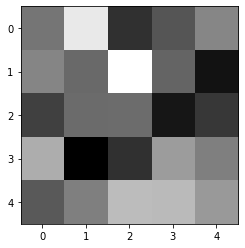

In [48]:
plt.imshow(inputs.view(5,5),cmap='binary')

In [49]:
inputs

tensor([[[[ 0.0322, -1.8697,  1.1777,  0.5684, -0.2458],
          [-0.2262,  0.2324, -2.2453,  0.3227,  1.6556],
          [ 0.9159,  0.1999,  0.1846,  1.6093,  1.0675],
          [-0.8831,  1.9757,  1.1516, -0.6116, -0.1308],
          [ 0.4999, -0.1341, -1.1250, -1.0930, -0.5574]]]])

In [50]:
conv = torch.nn.Conv2d(1, 32, 3)(inputs)

In [57]:
conv.shape

torch.Size([1, 32, 3, 3])

In [58]:
maxpool = torch.nn.MaxPool2d(3)(conv)

In [59]:
maxpool.shape

torch.Size([1, 32, 1, 1])

In [52]:
conv.shape

torch.Size([1, 32, 3, 3])

In [27]:
norm = tnn.BatchNorm1d(8)(inputs)

In [30]:
norm

tensor([[-1.0000,  1.0000, -0.9999, -1.0000,  1.0000,  0.9973,  1.0000,  0.9999],
        [ 1.0000, -1.0000,  0.9999,  1.0000, -1.0000, -0.9973, -1.0000, -0.9999]],
       grad_fn=<NativeBatchNormBackward>)

In [24]:
dropout == 0

tensor([[False, False,  True, False,  True,  True,  True,  True],
        [ True, False,  True,  True, False,  True,  True,  True]])

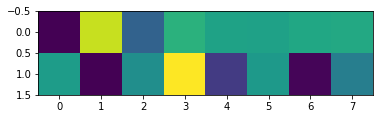

In [28]:
plt.imshow(inputs)

# 神经网络形状测试

In [5]:
conv1 = torch.nn.Conv1d(50, 50, 8, padding=5,).to(device)
pool1 = torch.nn.MaxPool1d(4).to(device)
conv2 = torch.nn.Conv1d(50, 50, 8, padding=5).to(device)
pool2 = torch.nn.MaxPool1d(4).to(device) # shape (batch_size, channel)
conv3 = torch.nn.Conv1d(50, 50, 8, padding=5).to(device)
global_pool = torch.nn.functional.max_pool1d
dense = torch.nn.Linear(1, 1).to(device)

NameError: name 'device' is not defined

In [ ]:
shapes = []
for i, batch in enumerate(trainLoader, 0):
                inputs, length, labels = textField.vocab.vectors[batch.text[0]].to(device), batch.text[1].to(
                device), batch.label.type(torch.FloatTensor).to(device)
                labels -= 1
                o = conv1(inputs.permute(0,2,1))
                o = pool1(o)
                o = conv2(o)
                o = pool2(o)
                o = conv3(o)
                o = global_pool(o,kernel_size=o.shape[2])
                shapes.append(o.shape)
